# Penguins

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

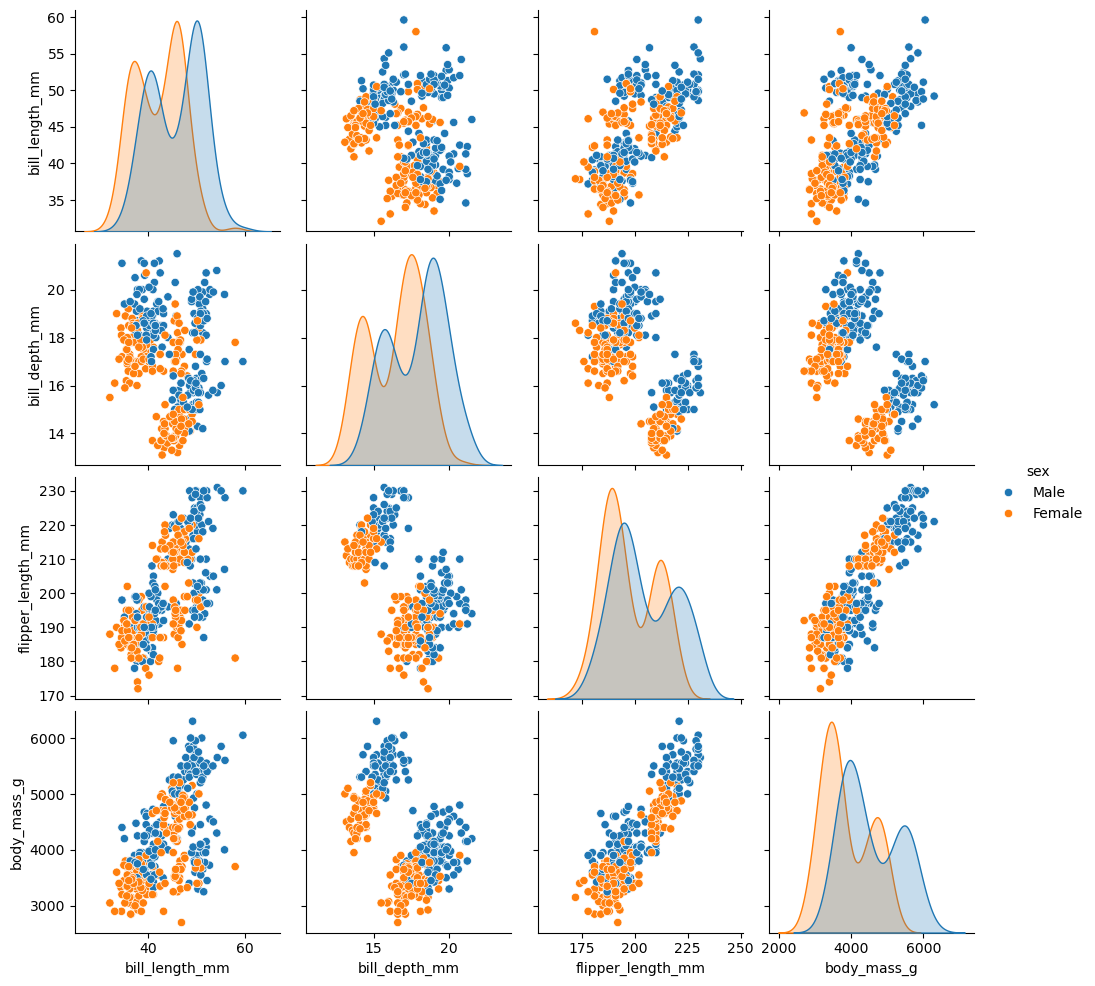

In [9]:
sns.pairplot(df, hue='sex')

### Data Cleaning

In [10]:
df.dropna(inplace=True)

In [16]:
df.drop('island', axis='columns', inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.2+ KB


In [56]:
df_encoded = pd.get_dummies(df, columns=['species'], drop_first=True, dtype=int)

In [57]:
target = 'sex'

df_target = df_encoded[[target]]
df_features = df_encoded.drop(target, axis='columns')

df_features.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0,0
1,39.5,17.4,186.0,3800.0,0,0
2,40.3,18.0,195.0,3250.0,0,0
4,36.7,19.3,193.0,3450.0,0,0
5,39.3,20.6,190.0,3650.0,0,0


In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

scaler.fit(df_features)

df_scaled_features = scaler.transform(df_features)

In [60]:
X = df_scaled_features.round(2)

In [61]:
y = df_target[target].values

In [62]:
y

array(['Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Ma

In [63]:
y.shape

(333,)

In [64]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 6)
(67, 6)
(266,)
(67,)


### Classification

### k Nearest Neighbor

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [122]:
classifier.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [123]:
y_predict = classifier.predict(X_test)

In [124]:
y_predict == y_test

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [125]:
n_correct = sum(y_predict == y_test)
n_correct

np.int64(61)

In [126]:
accuracy = n_correct / len(y_test)
print(f'accuracy = {accuracy:.2f}')

accuracy = 0.91


### Naief Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
classifier = GaussianNB()

In [129]:
classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [130]:
y_predict = classifier.predict(X_test)

In [131]:
accuracy = sum(y_predict == y_test) / len(y_test)
print(f'accuracy = {accuracy:.2f}')

accuracy = 0.60


### Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [169]:
classifier = DecisionTreeClassifier(max_depth=10)

In [170]:
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [171]:
y_predict = classifier.predict(X_test)

In [172]:
accuracy = sum(y_predict == y_test) / len(y_test)
print(f'accuracy = {accuracy:.2f}')

accuracy = 0.85


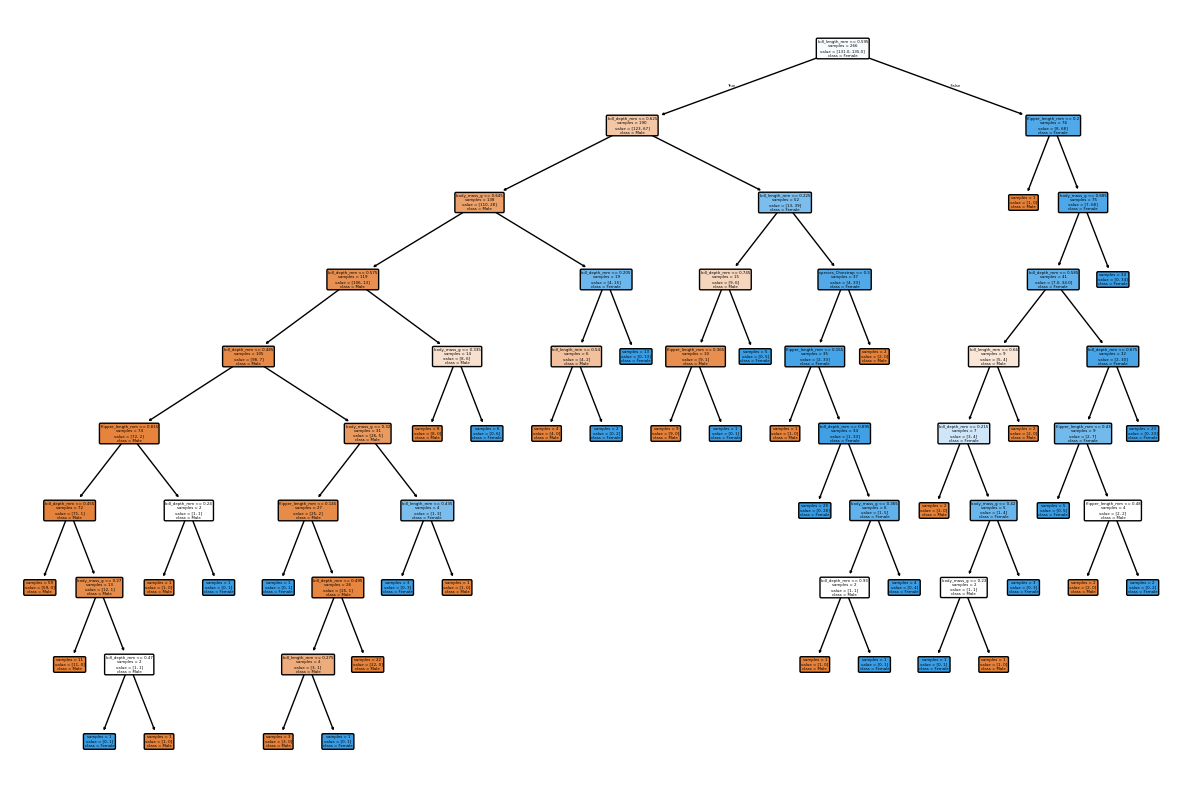

In [173]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15,10))

plot_tree(classifier, 
          feature_names = df_features.columns,
          class_names = df_target[target].unique(),
          filled = True,
          rounded = True, 
          impurity = False)

plt.show()

In [174]:
from sklearn.tree import export_text

print(export_text(classifier, 
                  feature_names = df_features.columns))

|--- bill_length_mm <= 0.59
|   |--- bill_depth_mm <= 0.62
|   |   |--- body_mass_g <= 0.64
|   |   |   |--- bill_depth_mm <= 0.57
|   |   |   |   |--- bill_depth_mm <= 0.48
|   |   |   |   |   |--- flipper_length_mm <= 0.81
|   |   |   |   |   |   |--- bill_depth_mm <= 0.45
|   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |--- bill_depth_mm >  0.45
|   |   |   |   |   |   |   |--- body_mass_g <= 0.27
|   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |--- body_mass_g >  0.27
|   |   |   |   |   |   |   |   |--- bill_depth_mm <= 0.47
|   |   |   |   |   |   |   |   |   |--- class: Male
|   |   |   |   |   |   |   |   |--- bill_depth_mm >  0.47
|   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |--- flipper_length_mm >  0.81
|   |   |   |   |   |   |--- bill_depth_mm <= 0.24
|   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |--- bill_depth_mm >  0.24
|   |   |   |   |   |   |   |--- class: Mal

In [175]:
print('Feature Importances Decision Tree')

for feature, importance in zip( df_features.columns, classifier.feature_importances_):
    print(f'{feature:25}: {importance:.3f}')

Feature Importances Decision Tree
bill_length_mm           : 0.329
bill_depth_mm            : 0.341
flipper_length_mm        : 0.083
body_mass_g              : 0.221
species_Chinstrap        : 0.025
species_Gentoo           : 0.000


### Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
classifier = RandomForestClassifier(n_estimators=100)

In [205]:
classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [206]:
y_predict = classifier.predict(X_test)

In [207]:
accuracy = sum(y_predict == y_test) / len(y_test)
print(f'accuracy = {accuracy:.2f}')

accuracy = 0.87


In [208]:
print('Feature Importances')

for feature, importance in zip( df_features.columns, classifier.feature_importances_):
    print(f'{feature:25}: {importance:.3f}')

Feature Importances
bill_length_mm           : 0.237
bill_depth_mm            : 0.307
flipper_length_mm        : 0.117
body_mass_g              : 0.291
species_Chinstrap        : 0.018
species_Gentoo           : 0.031
